#### Описание
Этот набор данных содержит более 80 000 сообщений о наблюдениях НЛО за последнее столетие.

### Подключение модулей

In [1]:
import pandas as pd   
import numpy as np
import seaborn as sns    
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Загрузка данных

In [2]:
df = pd.read_csv('scrubbed.csv')
df.head()

,datetime,city,state,country,ufo_shape,duration_seconds,duration_hours_min,comments,date_posted,latitude,longitude
0,5/15/1994 13:00,antarctica (ross ice shelf) (antarctica),NaN,NaN,fireball,2.000,2 seconds,green fireball streaking across the ski in a s...,1/28/1999,-82.862752,-135.000000
1,4/14/2002 22:22,invercargill (new zealand),NaN,NaN,unknown,12.000,9-12 sec.,object seems to disintergrate as if re-enterin...,5/14/2002,-46.413187,168.353773
2,10/23/2008 04:45,remote,wy,NaN,flash,0.001,0.001sec,brilliant strobe light at 4am&#44 moving light...,01/10/2009,-46.163992,169.875050
3,03/11/2009 00:00,oamaru (new zealand),NaN,NaN,changing,30.000,30 sec,flying car that person walked out of after crash,3/19/2009,-45.097512,170.970415
4,3/28/2012 06:30,queentown (close to) (new zealand),NaN,NaN,light,30.000,30 seconds,Light cross the sky dogging moviments,5/13/2012,-45.031162,168.662644


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            80328 non-null  object 
 1   city                80328 non-null  object 
 2   state               74532 non-null  object 
 3   country             70660 non-null  object 
 4   ufo_shape           78398 non-null  object 
 5   duration_seconds    80328 non-null  float64
 6   duration_hours_min  80328 non-null  object 
 7   comments            80313 non-null  object 
 8   date_posted         80328 non-null  object 
 9   latitude            80328 non-null  float64
 10  longitude           80328 non-null  float64
dtypes: float64(3), object(8)
memory usage: 6.7+ MB


#### Описание данных

- **datetime (Дата)** - Дата обнаружения НЛО.
- **city (Город)** - Город в котором обнаружили НЛО.
- **state (Штат)** - Штат в котором обнаружили НЛО.
- **country (Страна)** - Страна в которой обнаружили НЛО.
- **shape (Форма)** - Форма НЛО.
- **duration(seconds) (Длительность(секунды))** - Продолжиетльность наблюдения НЛО в секундах.
- **duration(hours/min) (Длительность(часы/минуты))** - Продолжиетльность наблюдения НЛО в часах/минутах.
- **coments (коментарии)** - Коментарии наблюдателя.
- **date posted (дата публикации)** - Дата публикации наблюдения.
- **coments (коментарии)** - Коментарии наблюдателя.
- **latitude (широта)** - широта на которой наблюдали НЛО.
- **longitude (долгота)** - долгота на которой наблюдали НЛО.

In [4]:
df.shape

(80332, 11)

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
datetime,80328,69582,07/04/2010 22:00,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,80328,19898,seattle,525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,74532,67,ca,9654,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,70660,5,us,65112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ufo_shape,78398,29,light,16565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_seconds,80328.0,NaN,NaN,NaN,9017.335648,620232.229169,0.001,30.0,180.0,600.0,97836000.0
duration_hours_min,80328,8301,5 minutes,4716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comments,80313,79993,Fireball,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_posted,80328,317,12/12/2009,1510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,80328.0,NaN,NaN,NaN,38.124963,10.469146,-82.862752,34.134722,39.4125,42.788333,72.7


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_seconds,80328.0,9017.335648,620232.229169,0.001000,30.000000,180.000000,600.000000,9.783600e+07
latitude,80328.0,38.124963,10.469146,-82.862752,34.134722,39.412500,42.788333,7.270000e+01
longitude,80328.0,-86.772015,39.697805,-176.658056,-112.073333,-87.903611,-78.755000,1.784419e+02


In [7]:
df.describe(include=[object])

,datetime,city,state,country,ufo_shape,duration_hours_min,comments,date_posted
count,80328,80328,74532,70660,78398,80328,80313,80328
unique,69582,19898,67,5,29,8301,79993,317
top,07/04/2010 22:00,seattle,ca,us,light,5 minutes,Fireball,12/12/2009
freq,36,525,9654,65112,16565,4716,11,1510


In [8]:
df.dtypes

datetime               object
city                   object
state                  object
country                object
ufo_shape              object
duration_seconds      float64
duration_hours_min     object
comments               object
date_posted            object
latitude              float64
longitude             float64
dtype: object

In [9]:
df.columns

Index(['datetime', 'city', 'state', 'country', 'ufo_shape', 'duration_seconds',
       'duration_hours_min', 'comments', 'date_posted', 'latitude',
       'longitude'],
      dtype='object')

In [10]:
# проверка на отсутствующие значения для всех колонок датафрейма
df.isna().sum()

datetime                 4
city                     4
state                 5800
country               9672
ufo_shape             1934
duration_seconds         4
duration_hours_min       4
comments                19
date_posted              4
latitude                 4
longitude                4
dtype: int64

In [11]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке datetime = 4
Кол-во пропусков в колонке city = 4
Кол-во пропусков в колонке state = 5800
Кол-во пропусков в колонке country = 9672
Кол-во пропусков в колонке ufo_shape = 1934
Кол-во пропусков в колонке duration_seconds = 4
Кол-во пропусков в колонке duration_hours_min = 4
Кол-во пропусков в колонке comments = 19
Кол-во пропусков в колонке date_posted = 4
Кол-во пропусков в колонке latitude = 4
Кол-во пропусков в колонке longitude = 4


In [12]:
for col in df.columns:
    print(f'Кол-во пропусков в колонке {col} = {df[col].isna().sum()/df.shape[0] * 100:.2f} % ')

Кол-во пропусков в колонке datetime = 0.00 % 
Кол-во пропусков в колонке city = 0.00 % 
Кол-во пропусков в колонке state = 7.22 % 
Кол-во пропусков в колонке country = 12.04 % 
Кол-во пропусков в колонке ufo_shape = 2.41 % 
Кол-во пропусков в колонке duration_seconds = 0.00 % 
Кол-во пропусков в колонке duration_hours_min = 0.00 % 
Кол-во пропусков в колонке comments = 0.02 % 
Кол-во пропусков в колонке date_posted = 0.00 % 
Кол-во пропусков в колонке latitude = 0.00 % 
Кол-во пропусков в колонке longitude = 0.00 % 


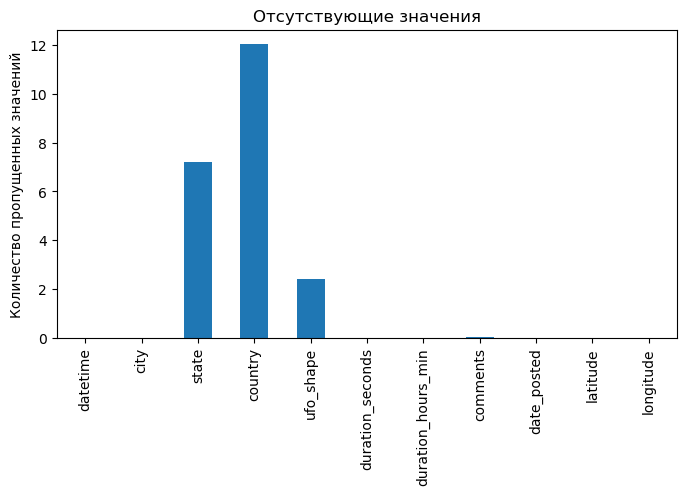

In [13]:
# Подсчет пропущенных значений в каждом столбце
missing_data = df.isna().sum()/df.shape[0] * 100

# Построение гистограммы пропущенных значений
missing_data.plot(kind='bar', figsize=(8, 4))
plt.title("Отсутствующие значения")
plt.ylabel("Количество пропущенных значений")
plt.show()

In [14]:
# Проверка на дублирование записей
df.duplicated().sum()

3

In [15]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)

df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()    # проверка

0

In [16]:
df.state.fillna(df['state'].mode()[0], inplace=True )
df.country.fillna(df['country'].mode()[0], inplace=True )
df.ufo_shape.fillna(df['ufo_shape'].mode()[0], inplace=True )
df.datetime.fillna(df['datetime'].mode()[0], inplace=True )
df.city.fillna(df['city'].mode()[0], inplace=True )
df.duration_seconds.fillna(df['duration_seconds'].mode()[0], inplace=True )
df.duration_hours_min.fillna(df['duration_hours_min'].mode()[0], inplace=True )
df.comments.fillna(df['comments'].mode()[0], inplace=True )
df.date_posted.fillna(df['date_posted'].mode()[0], inplace=True )
df.latitude.fillna(df['latitude'].mode()[0], inplace=True )
df.longitude.fillna(df['longitude'].mode()[0], inplace=True )

In [17]:
df.isna().sum()

datetime              0
city                  0
state                 0
country               0
ufo_shape             0
duration_seconds      0
duration_hours_min    0
comments              0
date_posted           0
latitude              0
longitude             0
dtype: int64

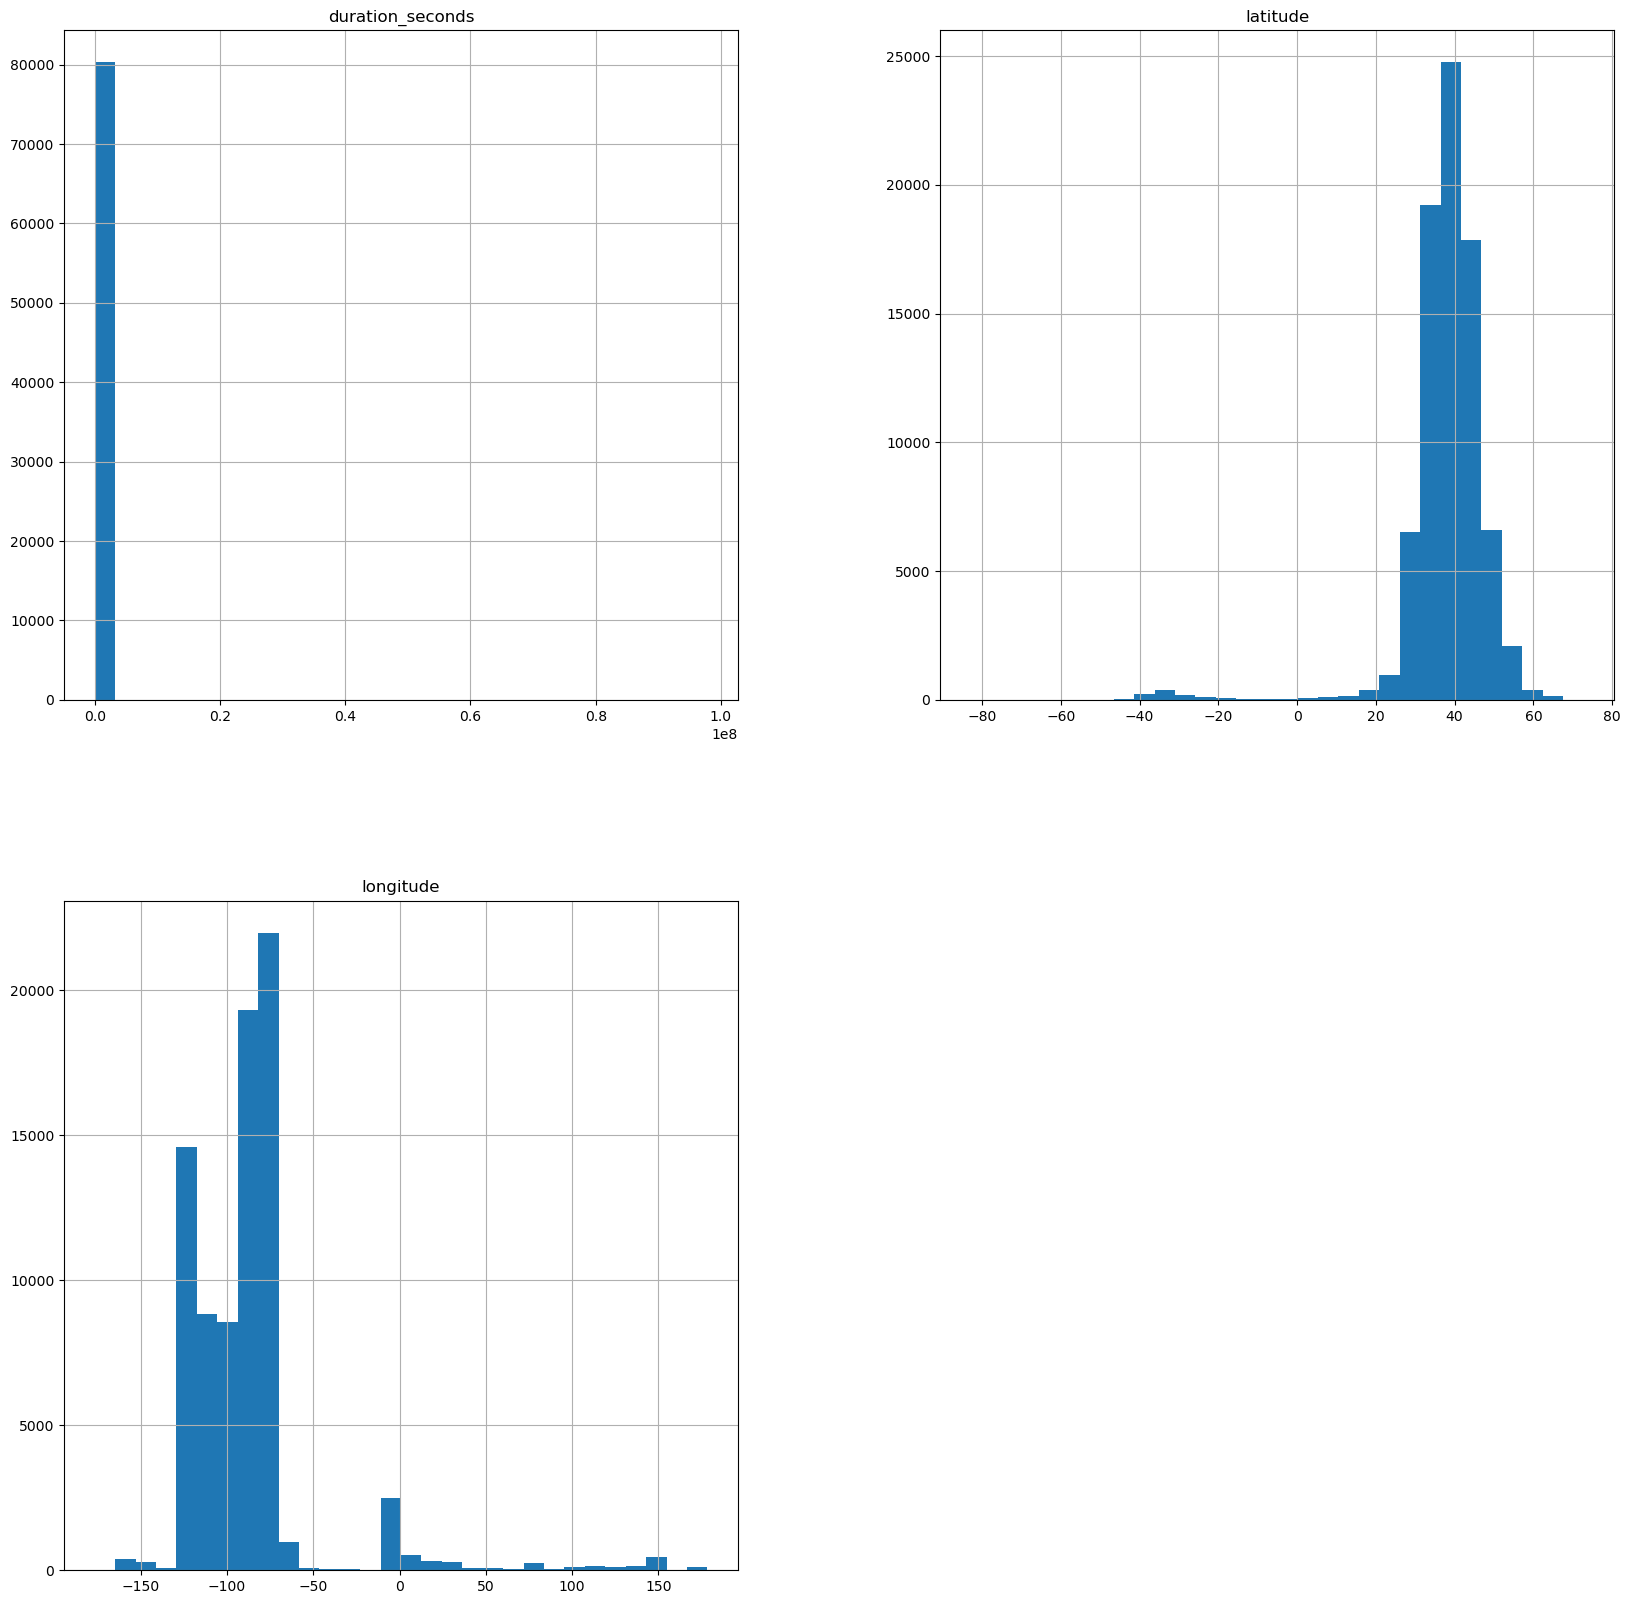

In [18]:
df.hist(figsize=(20,20), bins = 30);

In [20]:
numerical_all_colslist = df.select_dtypes(include=['float64', 'int64','int32']).columns
numerical_all_cols = df[numerical_all_colslist]
numerical_all_cols.head()

,duration_seconds,latitude,longitude
0,2.000,-82.862752,-135.000000
1,12.000,-46.413187,168.353773
2,0.001,-46.163992,169.875050
3,30.000,-45.097512,170.970415
4,30.000,-45.031162,168.662644


In [21]:
# 1. Separate categorical and numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(numerical_cols)
print(categorical_cols)
from sklearn.impute import SimpleImputer

# Imputation for numerical data (using mean)
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Imputation for categorical data (using most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

Index(['duration_seconds', 'latitude', 'longitude'], dtype='object')
Index(['datetime', 'city', 'state', 'country', 'ufo_shape',
       'duration_hours_min', 'comments', 'date_posted'],
      dtype='object')


In [22]:
numerical_cols

Index(['duration_seconds', 'latitude', 'longitude'], dtype='object')

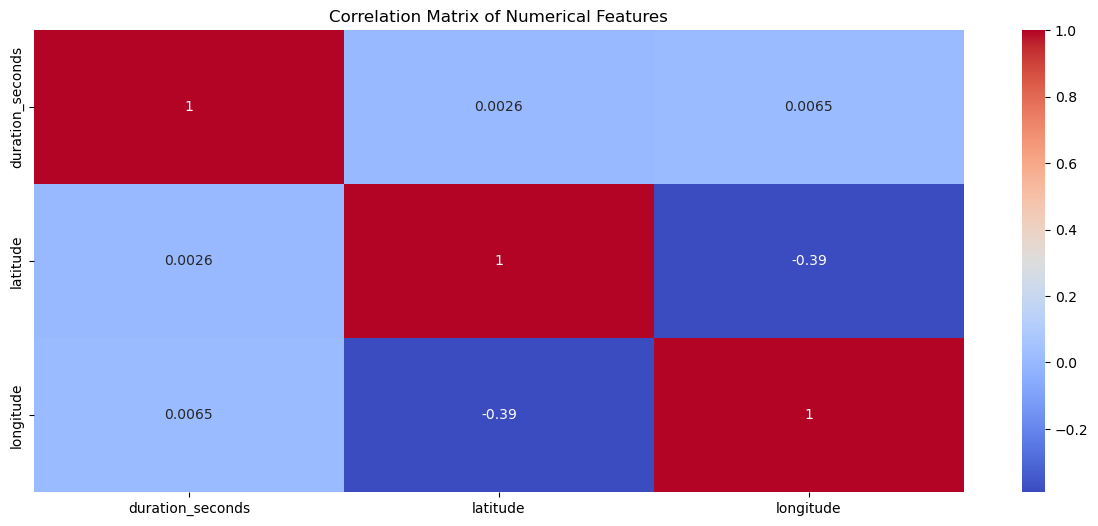

In [23]:
corr_matrix = numerical_all_cols.corr()

plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

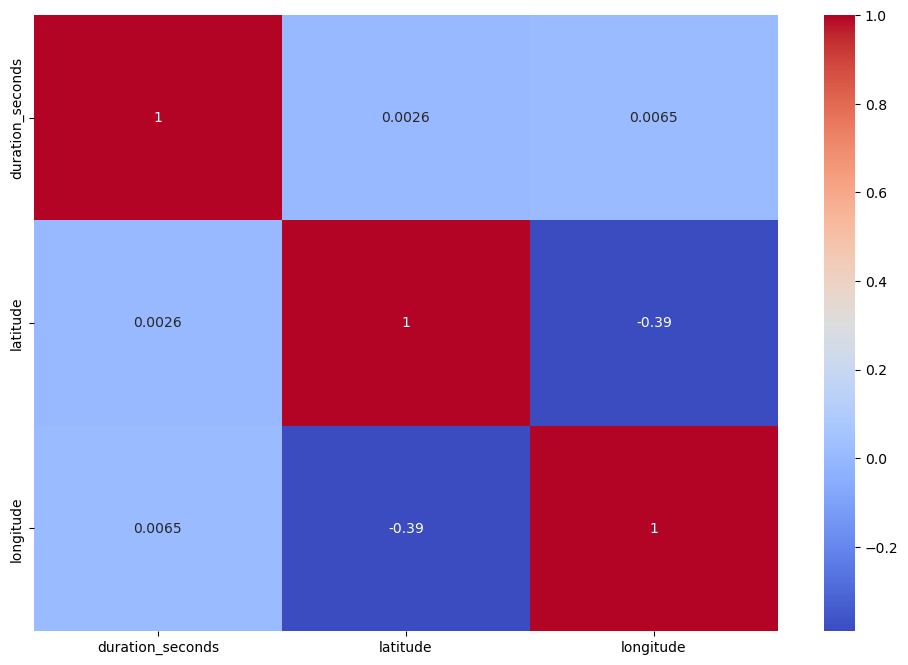

In [24]:
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: >

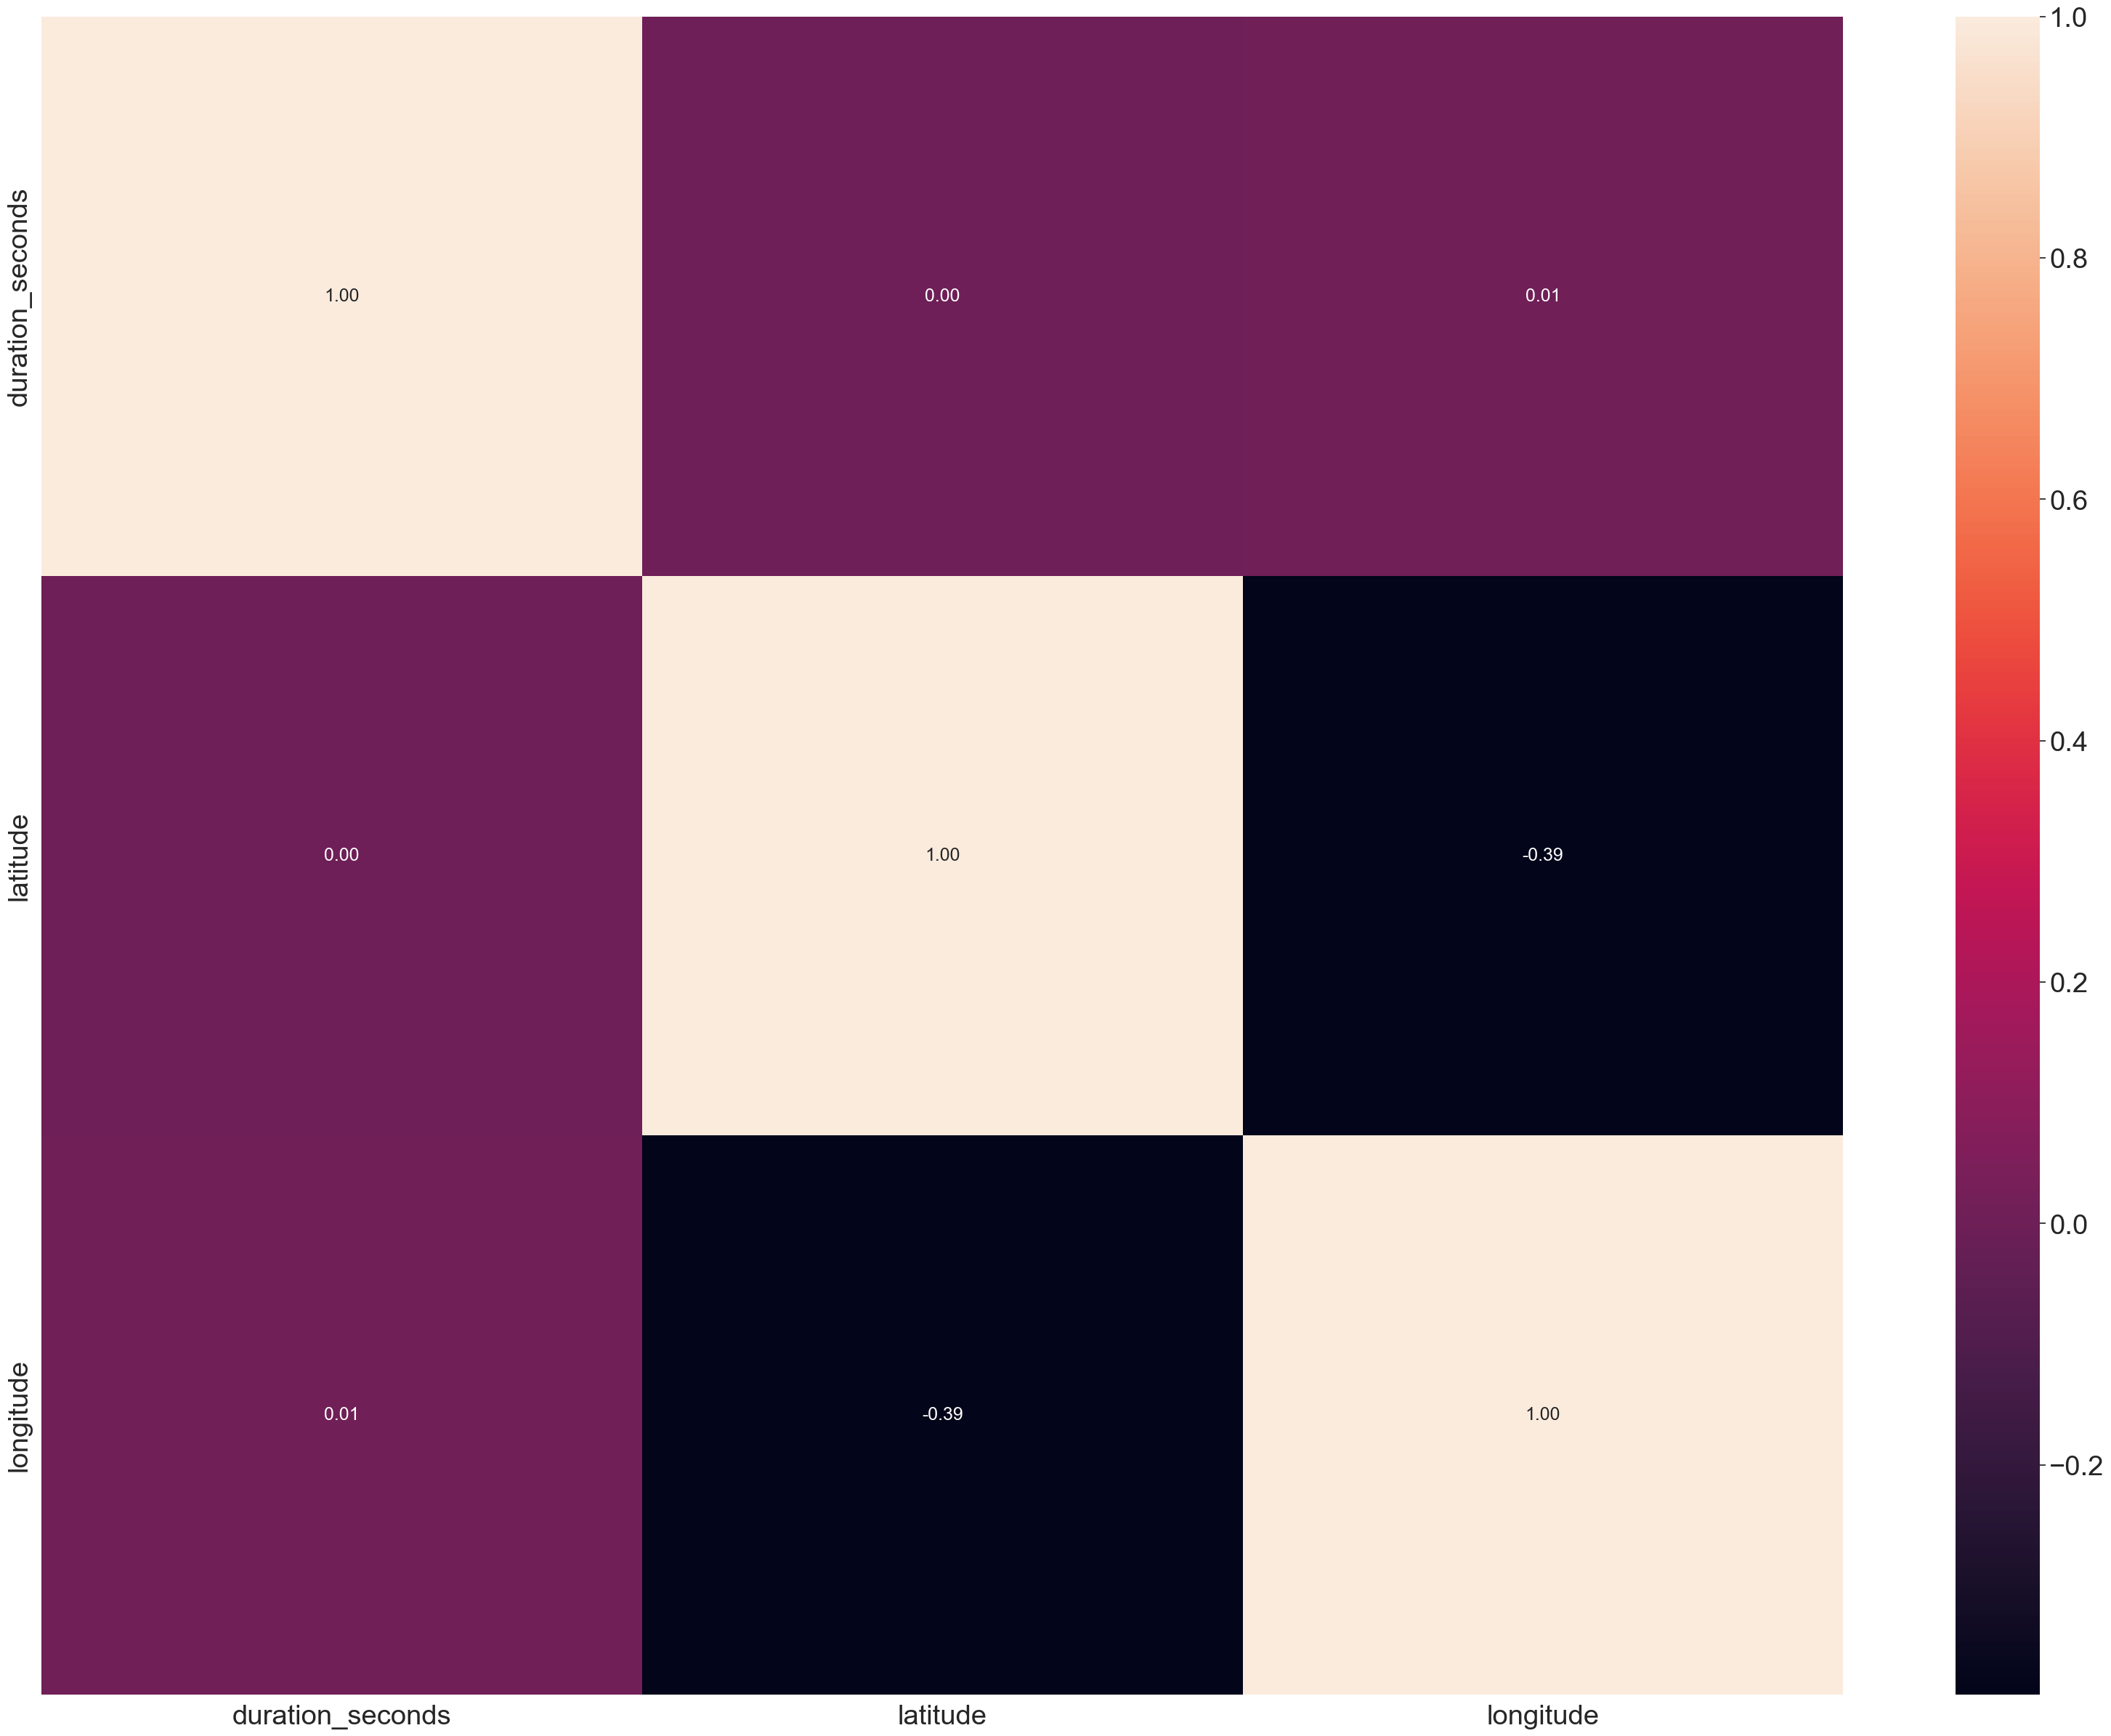

In [25]:
sns.set(font_scale=2.5)
plt.figure(figsize=(40,30))
corr_matrix=numerical_all_cols.corr()
sns.heatmap(corr_matrix,annot=True,fmt = ".2f",cbar = True,annot_kws={"size":18})